In [9]:
#Dependencies
import pandas as pd

In [10]:
import psycopg2
from sqlalchemy import create_engine
from config import database

#Create engine
#Config.py used to create engine. Default user/pass used. Please give feedback if that info is needed.
engine = create_engine(database)
connection = engine.connect()

#import matplotlib dependencies
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats

In [11]:
#Read in sql databases
employees = pd.read_sql("SELECT * FROM Employees", connection)
salary = pd.read_sql("SELECT * FROM Salaries", connection)
title = pd.read_sql("SELECT * FROM Titles", connection)

In [12]:
#Check employees to see if theres any null values
employees
#No null values as a to_date column was never provided

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [13]:
salary.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [14]:
title.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [15]:
#merge talbes employees and salary
merge_1 = pd.merge(employees, salary, on='emp_no')
merge_1.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [16]:
#Rename emp_title_id to title_id for merge setup
rename_merge = merge_1.rename(columns={"emp_title_id": "title_id"})
rename_merge.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [17]:
#Merge first table with title
new_emp = pd.merge(rename_merge, title, on='title_id')
new_emp.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


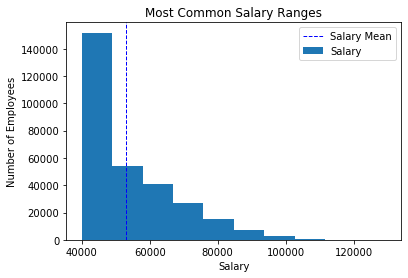

In [18]:
#Bonus 1 Create a histogram to visualize the most common salary ranges for employees
plt.hist(salary['salary'], 10, density=False, label="Salary")
mean_sal = salary['salary'].mean()
#code for the mean line accessed from: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.axvline.html
plt.axvline(mean_sal, color='b', linestyle='dashed', linewidth=1, label="Salary Mean")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.legend()
plt.title("Most Common Salary Ranges")
plt.savefig("MostCommonSalaryRanges.png")
plt.show()

In [19]:
#Bonus 2 Create a bar chart of average salary by title
#group titles and salaries, calculate the mean
salary_by_title = new_emp.groupby(['title'])['salary'].mean()
salary_by_title

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

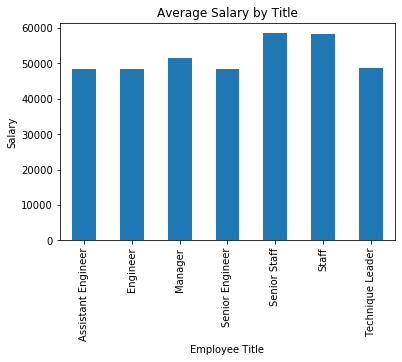

In [20]:
#make the bar chart for average salary by title
salary_by_title.plot.bar()
plt.title("Average Salary by Title")
plt.xlabel("Employee Title")
plt.ylabel("Salary")
plt.savefig("Avg_Salary.png")
plt.show()

In [21]:
#looking up employee ID
new_emp.loc[new_emp["emp_no"] == 499942]

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
287532,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,40000,Technique Leader
